In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
from df_tokenizer import DfTokenizer
from l_calculator import LCalculator
from m_calculator import MCalculator
from n_calculator import NCalculator
from q_calculator import QCalculator
from r_calculator import RCalculator
from d_calculator import DCalculator
from c_calculator import CCalculator

In [26]:
import seaborn as sns

In [3]:
files = pd.read_csv('files.csv', encoding='utf-8')

In [4]:
files_tokenizer = DfTokenizer(files, 'file')

In [5]:
requirements = pd.read_csv('requirements.csv', encoding='utf-8')

In [6]:
requirements_tokenizer = DfTokenizer(requirements, 'id')

In [7]:
complectations_file = open('complectations.json', 'r', encoding='utf-8')
complectations_data = complectations_file.read()
complectations_file.close()

In [8]:
tracer_file = open('tracer.json', 'r', encoding='utf-8')
tracer_data = tracer_file.read()
tracer_file.close()

In [9]:
dependencies_file = open('dependencies.json', 'r', encoding='utf-8')
dependencies_data = dependencies_file.read()
dependencies_file.close()

In [10]:
complectations = json.loads(complectations_data)
tracer = json.loads(tracer_data)
dependencies = json.loads(dependencies_data)

In [11]:
# Получить константы l, m, n

In [12]:
n_calculator = NCalculator(requirements)
m_calculator = MCalculator(files)
q_calculator = QCalculator(tracer, files_tokenizer, requirements_tokenizer, n_calculator, m_calculator)
l_calculator = LCalculator(complectations)
r_calculator = RCalculator(complectations, requirements_tokenizer, n_calculator)
d_calculator = DCalculator(dependencies, files_tokenizer, m_calculator)
c_calculator = CCalculator(n_calculator)

In [13]:
n = n_calculator.calculate()
m = m_calculator.calculate()
l = l_calculator.calculate()
Q = q_calculator.calculate()
R = r_calculator.calculate()
D = d_calculator.calculate()
C = c_calculator.calculate()

In [14]:
Q.shape

(161, 124)

In [15]:
R.shape

(10, 161)

In [16]:
D.shape

(124, 124)

In [17]:
C.shape

(161, 161)

In [18]:
constants_dict = {
    'n': n,
    'm': m,
    'l': l
}
constants_json = json.dumps(constants_dict)

In [19]:
with open('out/constants.json', 'w', encoding='utf-8') as constaints_file:
    pass
    # constaints_file.write(constants_json)

In [20]:
Q_df = pd.DataFrame(Q)
# Q_df.to_csv('out/Q.csv')

In [21]:
R_df = pd.DataFrame(R)
# R_df.to_csv('out/R.csv')

In [22]:
D_df = pd.DataFrame(D)
# D_df.to_csv('out/D.csv')

In [23]:
C_df = pd.DataFrame(C)
# C_df.to_csv('out/C.csv')

In [24]:
variables_calculator = lambda k, l, m, n: m * k + l * k + l * m * k + l * n + l * n * (n + 1) / 2

In [25]:
constraints_calculator = lambda k, l, m, n: m + 2 * l * k + 3 * l * m * k + 2 * l * n + 3 * l * n * (n + 1) / 2

In [27]:
variables_count_values = []
constraints_count_values = []
for k in range(1, 51):
    variables_count = variables_calculator(k, l, m, n)
    variables_count_values.append(variables_count)
    
    constraints_count = constraints_calculator(k, l, m, n)
    constraints_count_values.append(constraints_count)

In [28]:
count_dictionary = {
    'variables': variables_count_values,
    'constraints': constraints_count_values
}

In [29]:
count_dataframe = pd.DataFrame(count_dictionary)

<Axes: >

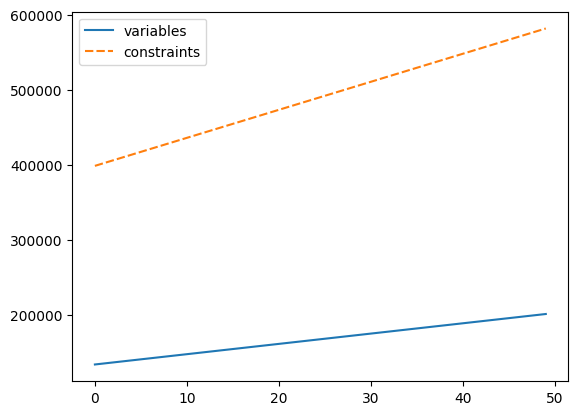

In [30]:
sns.lineplot(data=count_dataframe)

In [32]:
count_dataframe.index = range(1, 51)